## 0.0 read data

In [13]:
import numpy as np
from numpy import linalg
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import time
from datetime import date
import copy

In [117]:
df = pd.read_csv('./data/train.csv')
label = pd.read_csv('./data/train_label.csv')

In [118]:
df = df.drop(columns=['reservation_status'])

In [119]:
# convert month name to values
m = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df.arrival_date_month = df.arrival_date_month.map(m)

In [120]:
# convert hotel type to binary
h = {'City Hotel':0, 'Resort Hotel':1}
df.hotel = df.hotel.map(h)

In [121]:
df

,ID,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,0,1,0,342,2015,7,27,1,0,0,...,3,No Deposit,NaN,NaN,0,Transient,-6.305161,0,0,2015-07-01
1,1,0,0,257,2015,7,27,1,0,2,...,1,No Deposit,6.0,NaN,0,Transient,75.052227,0,0,2015-07-03
2,2,0,0,257,2015,7,27,1,0,2,...,0,No Deposit,6.0,NaN,0,Transient,74.546401,0,0,2015-07-03
3,3,0,0,257,2015,7,27,1,0,2,...,0,No Deposit,6.0,NaN,0,Transient,76.376288,0,0,2015-07-03
4,4,0,0,257,2015,7,27,1,0,2,...,0,No Deposit,6.0,NaN,0,Transient,49.411647,0,0,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91526,91526,1,1,19,2017,3,13,31,0,2,...,0,No Deposit,250.0,NaN,0,Transient,79.223571,0,1,2017-03-22
91527,91527,1,0,28,2017,3,13,31,0,2,...,0,No Deposit,NaN,NaN,0,Transient,-6.822102,0,0,2017-04-02
91528,91528,1,0,2,2017,3,13,31,0,1,...,1,No Deposit,NaN,NaN,0,Transient,90.814554,0,2,2017-04-01
91529,91529,1,0,30,2017,3,13,31,3,7,...,0,No Deposit,250.0,NaN,0,Transient,38.135565,0,1,2017-04-10


In [126]:
df_2016 = df[df['arrival_date_year'] == 2016]
df_201611 = df_2016[df_2016['arrival_date_month'] == 11]
df_20161130 = df_201611[df_201611['arrival_date_day_of_month'] == 30]

In [127]:
df_20161130

,ID,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
74776,74776,0,0,43,2016,11,49,30,2,4,...,0,No Deposit,9.0,NaN,0,Transient,89.492019,0,1,2016-12-06
74777,74777,0,0,42,2016,11,49,30,2,4,...,0,No Deposit,7.0,NaN,0,Transient,49.724337,0,1,2016-12-06
74778,74778,0,1,215,2016,11,49,30,0,4,...,0,No Deposit,9.0,NaN,0,Transient,42.398289,0,0,2016-08-03
74779,74779,0,0,15,2016,11,49,30,1,4,...,0,No Deposit,NaN,NaN,0,Transient,89.579433,0,0,2016-12-05
74780,74780,0,1,215,2016,11,49,30,0,4,...,1,No Deposit,9.0,NaN,0,Transient,37.282016,0,0,2016-08-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74838,74838,1,0,1,2016,11,49,30,0,3,...,0,No Deposit,240.0,NaN,0,Transient,56.939053,1,2,2016-12-03
74839,74839,1,0,1,2016,11,49,30,0,2,...,0,No Deposit,240.0,NaN,0,Transient,34.773759,1,1,2016-12-02
74840,74840,0,0,138,2016,11,49,30,0,3,...,3,No Deposit,9.0,NaN,0,Transient,72.291243,0,2,2016-12-03
74841,74841,0,0,12,2016,11,49,30,0,3,...,0,No Deposit,9.0,NaN,0,Transient,96.730231,0,2,2016-12-03


Split data at index 74843

:74842 -> train

74843: -> val

In [128]:
df

,ID,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,0,1,0,342,2015,7,27,1,0,0,...,3,No Deposit,NaN,NaN,0,Transient,-6.305161,0,0,2015-07-01
1,1,0,0,257,2015,7,27,1,0,2,...,1,No Deposit,6.0,NaN,0,Transient,75.052227,0,0,2015-07-03
2,2,0,0,257,2015,7,27,1,0,2,...,0,No Deposit,6.0,NaN,0,Transient,74.546401,0,0,2015-07-03
3,3,0,0,257,2015,7,27,1,0,2,...,0,No Deposit,6.0,NaN,0,Transient,76.376288,0,0,2015-07-03
4,4,0,0,257,2015,7,27,1,0,2,...,0,No Deposit,6.0,NaN,0,Transient,49.411647,0,0,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91526,91526,1,1,19,2017,3,13,31,0,2,...,0,No Deposit,250.0,NaN,0,Transient,79.223571,0,1,2017-03-22
91527,91527,1,0,28,2017,3,13,31,0,2,...,0,No Deposit,NaN,NaN,0,Transient,-6.822102,0,0,2017-04-02
91528,91528,1,0,2,2017,3,13,31,0,1,...,1,No Deposit,NaN,NaN,0,Transient,90.814554,0,2,2017-04-01
91529,91529,1,0,30,2017,3,13,31,3,7,...,0,No Deposit,250.0,NaN,0,Transient,38.135565,0,1,2017-04-10


In [84]:
def dateToWeekDay(df):
    year = df.arrival_date_year
    month = df.arrival_date_month
    day = df.arrival_date_day_of_month
    n = len(df)
    weekDays = [0 for i in range(n)]
    for i in range(n):
        weekDays[i] = date(year[i], month[i], day[i]).weekday()   
    # return 1~7
    df1 = copy.deepcopy(df)
    df1 = df1.rename(columns = {'arrival_date_year': 'year', 'arrival_date_month': 'month'})
    df1.insert(6,'weekDay', weekDays)
    df1 = pd.get_dummies(df1, columns = ['weekDay'])
    print(df1.columns)
    df1 = df1.drop(columns = ['weekDay_6']) # remove last one
    return df1;

In [129]:
df = dateToWeekDay(df)

Index(['ID', 'hotel', 'is_canceled', 'lead_time', 'year', 'month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'weekDay_0', 'weekDay_1', 'weekDay_2',
       'weekDay_3', 'weekDay_4', 'weekDay_5', 'weekDay_6'],
      dtype='object')


In [130]:
df

,ID,hotel,is_canceled,lead_time,year,month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,weekDay_0,weekDay_1,weekDay_2,weekDay_3,weekDay_4,weekDay_5
0,0,1,0,342,2015,7,27,1,0,0,...,-6.305161,0,0,2015-07-01,0,0,1,0,0,0
1,1,0,0,257,2015,7,27,1,0,2,...,75.052227,0,0,2015-07-03,0,0,1,0,0,0
2,2,0,0,257,2015,7,27,1,0,2,...,74.546401,0,0,2015-07-03,0,0,1,0,0,0
3,3,0,0,257,2015,7,27,1,0,2,...,76.376288,0,0,2015-07-03,0,0,1,0,0,0
4,4,0,0,257,2015,7,27,1,0,2,...,49.411647,0,0,2015-07-03,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91526,91526,1,1,19,2017,3,13,31,0,2,...,79.223571,0,1,2017-03-22,0,0,0,0,1,0
91527,91527,1,0,28,2017,3,13,31,0,2,...,-6.822102,0,0,2017-04-02,0,0,0,0,1,0
91528,91528,1,0,2,2017,3,13,31,0,1,...,90.814554,0,2,2017-04-01,0,0,0,0,1,0
91529,91529,1,0,30,2017,3,13,31,3,7,...,38.135565,0,1,2017-04-10,0,0,0,0,1,0


In [98]:
df.isna().sum()

ID                                    0
hotel                                 0
is_canceled                           0
lead_time                             0
year                                  0
month                                 0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             468
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             13217


"children" has few NAs, while "country", "agent", and "company" have a lot of NA values. So we will discard "country", "agent", "company" attributes, and fill in median in NA of "children".

In [131]:
df = df.drop(columns = ['year', 'country', 'agent', 'company', 'arrival_date_week_number', 'arrival_date_day_of_month'])

In [132]:
df = df.fillna(df.children.median())

In [133]:
df.columns

Index(['ID', 'hotel', 'is_canceled', 'lead_time', 'month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'weekDay_0', 'weekDay_1', 'weekDay_2',
       'weekDay_3', 'weekDay_4', 'weekDay_5'],
      dtype='object')

In [134]:
# Creating dummy variables:
df_dum = pd.get_dummies(df, columns=['month', 'meal', 'market_segment', 'distribution_channel', \
                                 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type'])
df_dum.columns

Index(['ID', 'hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status_date', 'weekDay_0',
       'weekDay_1', 'weekDay_2', 'weekDay_3', 'weekDay_4', 'weekDay_5',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'meal_BB', 'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined',
       'market_segment_Aviation', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_Undefined',
       'distribution_channel_Corporate', 'distribution_cha

In [135]:
# drop the last column of each dummy category
df_dum = df_dum.drop(columns = ['reservation_status_date', 'month_12', 'meal_Undefined', 'market_segment_Undefined', 'market_segment_Undefined', 'distribution_channel_Undefined', 'assigned_room_type_P', 'deposit_type_Refundable', 'customer_type_Transient-Party'])

In [136]:
df_dum

,ID,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_No Deposit,deposit_type_Non Refund,customer_type_Contract,customer_type_Group,customer_type_Transient
0,0,1,0,342,0,0,2,0.0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,0,0,257,0,2,1,0.0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,0,0,257,0,2,2,0.0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,3,0,0,257,0,2,2,0.0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,4,0,0,257,0,2,2,0.0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91526,91526,1,1,19,0,2,2,2.0,0,0,...,0,0,0,0,0,1,0,0,0,1
91527,91527,1,0,28,0,2,2,0.0,0,0,...,0,0,0,0,0,1,0,0,0,1
91528,91528,1,0,2,0,1,2,0.0,0,0,...,0,0,0,0,0,1,0,0,0,1
91529,91529,1,0,30,3,7,2,0.0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [137]:
df_dum.columns

Index(['ID', 'hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'weekDay_0', 'weekDay_1', 'weekDay_2',
       'weekDay_3', 'weekDay_4', 'weekDay_5', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'meal_BB', 'meal_FB', 'meal_HB', 'meal_SC',
       'market_segment_Aviation', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'distribution_channel_Corporate',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'reserved_roo

## Basic analysis

#### Target: "is_canceled"

Steps:

1. Predict "is_canceled" by attributes in each tuple

2. Multiply predictions by "ADR"

3. Group by date

4. Predict classification of the daily revenue to the labels on $y$.


In [105]:
df_dum.describe()

,ID,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_No Deposit,deposit_type_Non Refund,customer_type_Contract,customer_type_Group,customer_type_Transient
count,91531.000000,91531.000000,91531.000000,91531.000000,91531.000000,91531.000000,91531.000000,91531.000000,91531.000000,91531.000000,...,91531.000000,91531.000000,91531.000000,91531.000000,91531.000000,91531.000000,91531.000000,91531.000000,91531.000000,91531.000000
mean,45765.000000,0.342299,0.357912,96.286843,0.899291,2.448438,1.835761,0.090964,0.008369,0.033890,...,0.020102,0.005714,0.003256,0.002546,0.000011,0.869957,0.128568,0.037834,0.004873,0.723646
std,26422.868082,0.474482,0.479389,105.454726,1.004555,1.935080,0.605828,0.373909,0.101749,0.180947,...,0.140352,0.075375,0.056966,0.050390,0.003305,0.336353,0.334724,0.190796,0.069635,0.447197
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22882.500000,0.000000,0.000000,15.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,45765.000000,0.000000,0.000000,58.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,68647.500000,1.000000,1.000000,145.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,91530.000000,1.000000,1.000000,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Building X and y

#### Splitting train/validation
(isCan/adr)

Split data at index 74843

:74842 -> train

74843: -> val

In [141]:
df.loc[74843:, :]

,ID,hotel,is_canceled,lead_time,month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,weekDay_0,weekDay_1,weekDay_2,weekDay_3,weekDay_4,weekDay_5
74843,74843,0,1,290,12,1,3,2,0.0,0,...,81.641074,0,0,2016-10-27,0,0,0,1,0,0
74844,74844,0,1,510,12,0,2,2,0.0,0,...,29.575004,0,0,2015-10-21,0,0,0,1,0,0
74845,74845,0,1,510,12,0,2,2,0.0,0,...,57.371120,0,0,2015-10-21,0,0,0,1,0,0
74846,74846,0,1,510,12,0,2,2,0.0,0,...,16.688661,0,0,2015-10-21,0,0,0,1,0,0
74847,74847,0,1,510,12,0,2,2,0.0,0,...,12.656147,0,0,2015-10-21,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91526,91526,1,1,19,3,0,2,2,2.0,0,...,79.223571,0,1,2017-03-22,0,0,0,0,1,0
91527,91527,1,0,28,3,0,2,2,0.0,0,...,-6.822102,0,0,2017-04-02,0,0,0,0,1,0
91528,91528,1,0,2,3,0,1,2,0.0,0,...,90.814554,0,2,2017-04-01,0,0,0,0,1,0
91529,91529,1,0,30,3,3,7,2,0.0,0,...,38.135565,0,1,2017-04-10,0,0,0,0,1,0


In [148]:
train = df_dum.loc[:74842, :]
val = df_dum.loc[74843:, :]

X_train = train.drop(columns = ['is_canceled', 'adr'])
y_train_isCan = train['is_canceled']
y_train_adr = train['adr']
X_val = val.drop(columns = ['is_canceled', 'adr'])
y_val_isCan = val['is_canceled']
y_val_adr = val['adr']
# ~2016/11

In [149]:
X_train

,ID,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_No Deposit,deposit_type_Non Refund,customer_type_Contract,customer_type_Group,customer_type_Transient
0,0,1,342,0,0,2,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,0,257,0,2,1,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,0,257,0,2,2,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,3,0,257,0,2,2,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,4,0,257,0,2,2,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74838,74838,1,1,0,3,2,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
74839,74839,1,1,0,2,1,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
74840,74840,0,138,0,3,1,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
74841,74841,0,12,0,3,2,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [150]:
X_val

,ID,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_No Deposit,deposit_type_Non Refund,customer_type_Contract,customer_type_Group,customer_type_Transient
74843,74843,0,290,1,3,2,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
74844,74844,0,510,0,2,2,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
74845,74845,0,510,0,2,2,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
74846,74846,0,510,0,2,2,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
74847,74847,0,510,0,2,2,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91526,91526,1,19,0,2,2,2.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
91527,91527,1,28,0,2,2,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
91528,91528,1,2,0,1,2,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
91529,91529,1,30,3,7,2,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [143]:
y_train_isCan.value_counts(normalize=True)

0    0.638163
1    0.361837
Name: is_canceled, dtype: float64

The cancel rate is around 35%.

In [144]:
y_train_adr.value_counts()

0.000000      75
47.000000      5
31.000000      5
42.000000      5
16.000000      4
              ..
139.827646     1
79.667069      1
115.188575     1
151.865524     1
50.842307      1
Name: adr, Length: 74732, dtype: int64

## feature selection

In [162]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif # chi2 only takes non-negative, drop adr for now

In [160]:
def featureSelect_isCan(X_train, y_train): # select 10 best
    X_10_best= SelectKBest(chi2, k=10).fit(X_train, y_train)
    mask = X_10_best.get_support() #list of booleans for selected features
    new_feat = [] 
    for bool, feature in zip(mask, X_train.columns):
        if bool:
            new_feat.append(feature)
    print('The best features are:{}'.format(new_feat)) # The list of your 10 best features

In [163]:
def featureSelect_adr(X_train, y_train): # select 10 best
    X_10_best= SelectKBest(f_classif, k=10).fit(X_train, y_train)
    mask = X_10_best.get_support() #list of booleans for selected features
    new_feat = [] 
    for bool, feature in zip(mask, X_train.columns):
        if bool:
            new_feat.append(feature)
    print('The best features are:{}'.format(new_feat)) # The list of your 10 best features

In [161]:
featureSelect_isCan(X_train, y_train_isCan)

The best features are:['ID', 'lead_time', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'market_segment_Groups', 'deposit_type_Non Refund']


In [164]:
featureSelect_adr(X_train, y_train_adr)

The best features are:['hotel', 'days_in_waiting_list', 'meal_FB', 'market_segment_Aviation', 'market_segment_Complementary', 'distribution_channel_GDS', 'reserved_room_type_B', 'reserved_room_type_L', 'assigned_room_type_B', 'assigned_room_type_L']


/Users/joannehuang/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [167]:
X_train.shape

(74843, 73)

In [168]:
X_val.shape

(16688, 73)

In [174]:
temp = X_val.to_numpy()

In [175]:
temp.shape

(16688, 73)

In [172]:
temp.reshape(len(temp), -1)

array([[7.4843e+04, 0.0000e+00, 2.9000e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [7.4844e+04, 0.0000e+00, 5.1000e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [7.4845e+04, 0.0000e+00, 5.1000e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [9.1528e+04, 1.0000e+00, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [9.1529e+04, 1.0000e+00, 3.0000e+01, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [9.1530e+04, 1.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [173]:
temp.shape

(16688, 73)

### kNN

In [176]:
def train_KNN_isCan(X_train_df, y_train, k, X_val_df, y_val):
    X_train_feat = X_train[['ID', 'lead_time', 'previous_cancellations', \
                            'previous_bookings_not_canceled', 'booking_changes', \
                            'days_in_waiting_list', 'required_car_parking_spaces', \
                            'total_of_special_requests', 'market_segment_Groups', 'deposit_type_Non Refund']]
    X_train_feat = X_train_feat.to_numpy()
    knn = KNeighborsClassifier(n_neighbors = k)
    knn_best = knn.fit(X_train_feat, y_train)
    X_val = X_val_df.to_numpy()
    X_val = X_val.reshape(len(X_val), -1)
    y_pred = knn_best.predict(X_val)
    sc = knn_best.score(X_val, y_val, sample_weight=None)
    return y_pred, sc;

In [177]:
y_pred, sc = train_KNN_isCan(X_train, y_train_isCan, 5, X_val, y_val_isCan)

ValueError: query data dimension must match training data dimension

In [23]:
X_train = X_train.to_numpy()

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')

In [30]:
print(scores)

[0.99801557 0.94527363 0.95484273 0.97366791 0.95815116 0.97785245
 0.97094068 0.95546318 0.98014888 0.99419847]


In [31]:
print(scores.mean())

0.9708554665559914


In [124]:
# k_range = range(1, 20)
# k_scores = []
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='f1') # usually more indicative
#     k_scores.append(scores.mean())

Text(0, 0.5, 'Cross-validated F1')

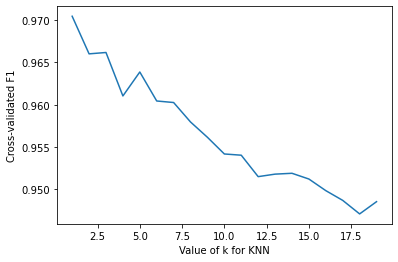

In [128]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# # plot the value of k of kNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(k_range, k_scores)
# plt.xlabel('Value of k for KNN')
# plt.ylabel('Cross-validated F1')

Using 6 features selected by $\chi^2$ with kNN ($k = 5$), we get an average accuracy of 0.97.

#### Perform polynomial (quadratic without interaction) transform on the 6 features

In [124]:
X_train_2 = X_train.copy()

In [125]:
# X_train_2['lead_time_2'] = X_train_2['lead_time'] ** 2
X_train_2['previous_cancellations_2'] = X_train_2['previous_cancellations'] ** 2
# X_train_2['days_in_waiting_list_2'] = X_train_2['days_in_waiting_list'] ** 2

In [107]:
X_train_2

,lead_time,previous_cancellations,days_in_waiting_list,deposit_type_Non Refund,reservation_status_Canceled,reservation_status_Check-Out,lead_time_2,previous_cancellations_2,days_in_waiting_list_2
0,342,0,0,0,0,1,116964,0,0
1,257,0,0,0,0,1,66049,0,0
2,257,0,0,0,0,1,66049,0,0
3,257,0,0,0,0,1,66049,0,0
4,257,0,0,0,0,1,66049,0,0
...,...,...,...,...,...,...,...,...,...
91526,19,0,0,0,1,0,361,0,0
91527,28,0,0,0,0,1,784,0,0
91528,2,0,0,0,0,1,4,0,0
91529,30,0,0,0,0,1,900,0,0


In [109]:
X_6_best= SelectKBest(chi2, k=6).fit(X_train_2, y_train)
mask = X_5_best.get_support() #list of booleans for selected features
new_feat = [] 
for bool, feature in zip(mask, X_train_2.columns):
    if bool:
        new_feat.append(feature)
print('The best features are:{}'.format(new_feat)) # The list of your 10 best features

The best features are:['lead_time', 'days_in_waiting_list', 'reservation_status_Canceled', 'lead_time_2', 'previous_cancellations_2', 'days_in_waiting_list_2']


In [110]:
X_train_2 = X_train_2[['lead_time','lead_time_2', 'previous_cancellations_2', 'days_in_waiting_list', \
              'days_in_waiting_list_2', 'reservation_status_Canceled']]

In [111]:
X_train_2

,lead_time,lead_time_2,previous_cancellations_2,days_in_waiting_list,days_in_waiting_list_2,reservation_status_Canceled
0,342,116964,0,0,0,0
1,257,66049,0,0,0,0
2,257,66049,0,0,0,0
3,257,66049,0,0,0,0
4,257,66049,0,0,0,0
...,...,...,...,...,...,...
91526,19,361,0,0,0,1
91527,28,784,0,0,0,0
91528,2,4,0,0,0,0
91529,30,900,0,0,0,0


In [126]:
X_train_2 = X_train_2.to_numpy()

In [127]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train_2, y_train, cv=10, scoring='accuracy')

In [128]:
print(scores)

[0.99836137 0.956954   0.96809789 0.98164536 0.96995521 0.99027641
 0.97782148 0.96678685 0.98503223 0.99158746]


In [129]:
print(scores.mean())

0.9786518260529655


After second-order transform, the accuracy score becomes lower.

prev: accuracy = 0.978 <br>
prev + days: accuracy = 0.9763356563072726

### Calculate predicted daily revenue

In [179]:
def calculateDateRevenue(df):
    df1 = df[["arrival_date_year", "arrival_date_month", "arrival_date_day_of_month", "adr", "is_canceled"]]
    df2["can_adr"] = df1["is_canceled"] * df1["adr"] 
    df3 = df2[["arrival_date_year", "arrival_date_month", "arrival_date_day_of_month", "can_adr"]]
    df4 = df3.groupby(by=["arrival_date_year", "arrival_date_month", "arrival_date_day_of_month"]).sum()
    x = df4.to_numpy()
    return(x) # one column: revenue

### Desicion Stump (revenue to label by Training Data)

In [180]:
x_train = calculateDateRevenue(df)

In [181]:
y_train = label["label"].to_numpy()

In [182]:
from sklearn import tree

# classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

### Computing accuracy 

In [183]:
def computeAccuracy(x, y): #x: test revenue, y: test label
    y_result = clf.predict(x)
    y_proba = clf.predict_proba(x) 

    # print(y_proba)
    accuracy_score(y, y_result)
    print("Number of mislabeled points out of a total %d points : %d"% (x.shape[0],(y != y_result).sum()))

In [184]:
computeAccuracy(x_train, y_train)

Number of mislabeled points out of a total 640 points : 0
